In [1]:
import numpy
import pandas
import sys
import yaml
import xarray
import pathlib
import geopandas as gpd
import contextily as cx
import cmocean as cm
import matplotlib as mpl

import matplotlib.pyplot as plt
sys.path.insert(1,'../../scripts/')
from ssm_utils import get_nearest_node,reshape_fvcom 

In [2]:
with open('../../etc/SSM_config_whidbey.yaml', 'r') as file:
    ssm = yaml.safe_load(file)
# get shapefile path    
shp = ssm['paths']['shapefile']
gdf = gpd.read_file(shp)


In [3]:
[node_ids,index,x,y]=get_nearest_node(shp,lats=[47.416747,47.398158,47.385607],lons=[-122.887748,-122.926887,-122.970146])

In [4]:
gdf=gdf.rename(columns={'region_inf':'Regions'})
gdf[['Regions','tce']].groupby('Regions').count()

,tce
Regions,
Hood,401
Main,893
Other,29
SJF_Admiralty,774
SOG_Bellingham,488
South_Sound,1028
Whidbey,531


# Load variables

In [5]:
%%time

node_id=node_ids[0]#6369 #Bbay low DO
# use NO3 directory to get a list of subdirectories 
model_var='NO3'

paths=[
    '/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/wqm_baseline/ssm_output.nc',
    '/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/wqm_reference/ssm_output.nc'
]
case=[
    'base',
    'ref'
]
hourly_values={}
NO_2d={}
DO_2d={}
sal_2d={}

for idx,path in enumerate(paths):
    ds = xarray.open_dataset(path,engine='netcdf4')
    hourly_values[case[idx]] = reshape_fvcom(
        ds['NO3'],'days'
    )
    NO_2d[case[idx]] = ds['NO3'][:,:,node_id-1]+ds['NH4'][:,:,node_id-1]
    DO_2d[case[idx]] = ds['DOXG'][:,:,node_id-1]
    sal_2d[case[idx]]=ds['salinity'][:,:,node_id-1]


8784 10 16012
8784 10 16012
CPU times: user 288 ms, sys: 11.9 s, total: 12.2 s
Wall time: 56.7 s


In [6]:
# load sediment file 
case=[
    'base',
    'ref'
]
paths_sed = [
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel-analysis/SSM_model_output/ssm_output_sediments_WQM.nc',
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel-analysis/SSM_model_output/ssm_output_sediments_WQM_REF.nc'
]
paths_NPP =[
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel-analysis/SSM_model_output/ssm_output_NPP_WQM.nc',
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel-analysis/SSM_model_output/ssm_output_NPP_WQM_REF.nc'
    
]
NPP_2d={}
for idx,path in enumerate(paths_sed):
    print(case[idx])
    ds_sed = xarray.open_dataset(path,engine='netcdf4')
    NPP_2d[case[idx]] = ds_sed['netPP'][:,node_id-1]

base
ref


# Plot nodes

/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/.conda/envs/klone_jupyter/lib/python3.10/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/.conda/envs/klone_jupyter/lib/python3.10/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/.conda/envs/klone_jupyter/lib/python3.10/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/.conda/envs/klone_jupyter/lib/python3.10/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore a

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


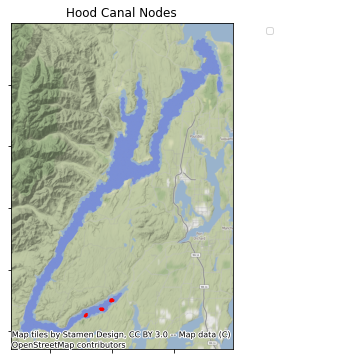

In [7]:
fig_title = f"Hood Canal Nodes"
region = 'Hood'
graphics_name = f"Regions.png"
# plot differences for each run
fig, axs = plt.subplots(1,1, figsize = (8,6))
gdf_region=gdf.loc[gdf['Regions']==region]
gdf_region.plot('Regions',ax=axs, color='blue',
legend=region,alpha=0.2)
for node_id in node_ids:
    gdf_region.loc[gdf_region['tce']==node_id].plot('Regions',ax=axs, color='red',
legend=f'{node_id}')
cx.add_basemap(axs, crs=gdf.crs, alpha=1)  
axs.set_title(fig_title)
axs.set_xticklabels('')
axs.set_yticklabels('')

axs.legend(
    bbox_to_anchor=(1.2,1),
    loc='upper right'
    )

# Plot 2D time series of Total Inorganic Nitrogen, O2, DO

In [8]:
# create date vector
dti = pandas.date_range("2014-01-01", periods=24*366, freq="H")
dti[-1]

Timestamp('2015-01-01 23:00:00', freq='H')

node_id:  14141
8784 10 16012
8784 10 16012


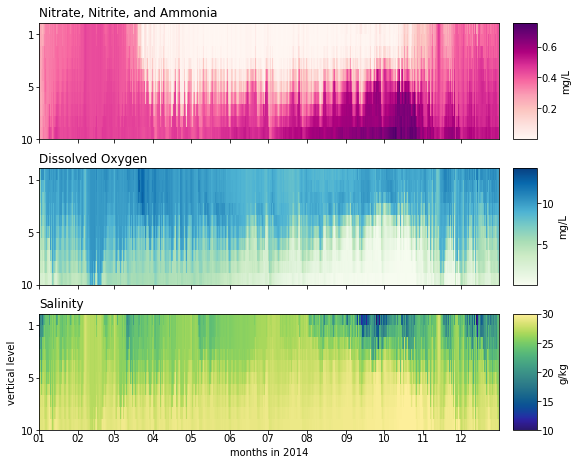

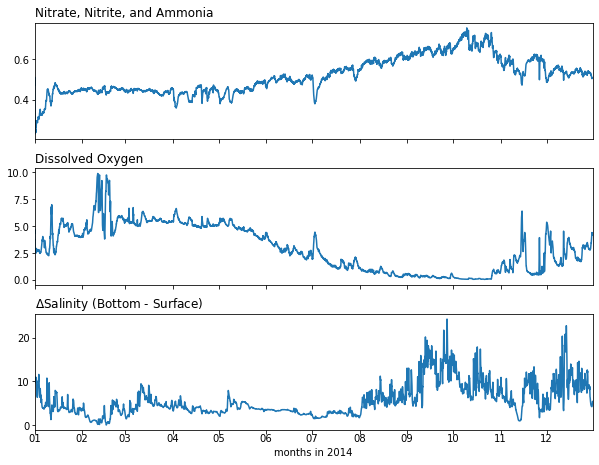

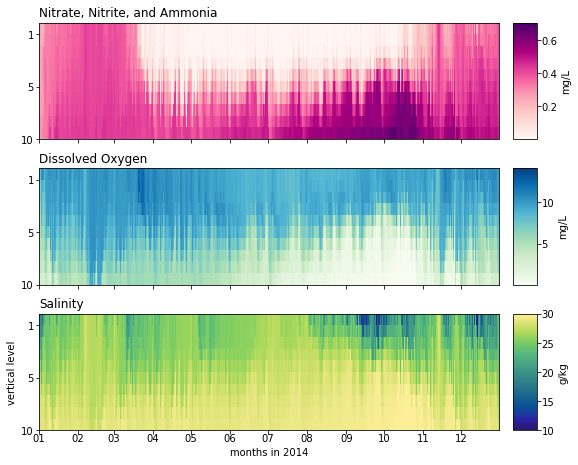

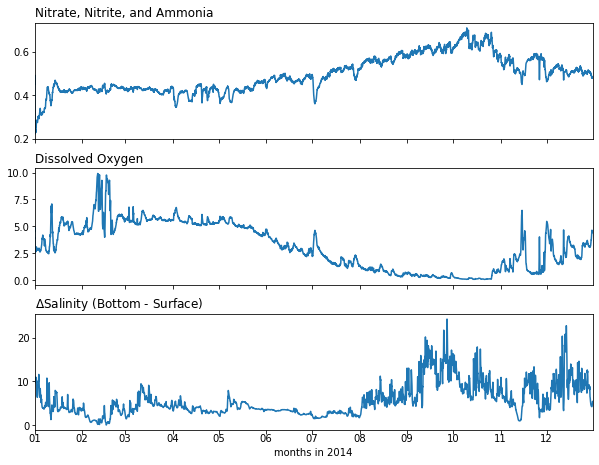

node_id:  14080
8784 10 16012
8784 10 16012


In [ ]:
for node_id in node_ids:   
    print('node_id: ', node_id)
    for idx,path in enumerate(paths):
        ds = xarray.open_dataset(path,engine='netcdf4')
        hourly_values[case[idx]] = reshape_fvcom(
            ds['NO3'],'days'
        )
        NO_2d[case[idx]] = ds['NO3'][:,:,node_id-1]+ds['NH4'][:,:,node_id-1]
        DO_2d[case[idx]] = ds['DOXG'][:,:,node_id-1]
        sal_2d[case[idx]]=ds['salinity'][:,:,node_id-1]
    for case in ['base','ref']:
        fig, axs = plt.subplots(3,1, figsize = (10,5*3/2),
            gridspec_kw={
               'width_ratios': [1],
               'height_ratios': [1,1,1], 
                'wspace': 0.25,
                'hspace': 0.25})
        no3mesh=axs[0].pcolormesh(dti,[1,2,3,4,5,6,7,8,9,10],numpy.flip(NO_2d[case].transpose(),axis=0),cmap='RdPu')
        doxgmesh=axs[1].pcolormesh(dti,[1,2,3,4,5,6,7,8,9,10],numpy.flip(DO_2d[case].transpose(),axis=0),cmap='GnBu')
        salmesh=axs[2].pcolormesh(dti,[1,2,3,4,5,6,7,8,9,10],numpy.flip(sal_2d[case].transpose(),axis=0),cmap=cm.cm.haline,vmin=10,vmax=30)
        
        cb0=fig.colorbar(no3mesh, ax=axs[0], pad = 0.025, label='mg/L',aspect=5)
        cb1=fig.colorbar(doxgmesh, ax=axs[1], pad = 0.025, label='mg/L',aspect=5)
        cb2=fig.colorbar(salmesh, ax=axs[2], pad = 0.025, label='g/kg',aspect=5)

        for ya in [0,1,2]:
            axs[ya].set_xlim(numpy.datetime64('2014-01-01'), numpy.datetime64('2014-12-31'))
            # set x-ticklabels to the first day of the month
            axs[ya].xaxis.set_major_locator(mpl.dates.MonthLocator())
            axs[ya].xaxis.set_major_formatter(mpl.dates.DateFormatter('%m'))
            axs[ya].set_yticks([0.5,5,9.5])
            axs[ya].set_yticklabels(['10','5','1'])


        axs[0].set_title('Nitrate, Nitrite, and Ammonia',loc='left')
        axs[1].set_title('Dissolved Oxygen',loc='left')
        axs[2].set_title('Salinity',loc='left')

        axs[0].set_xticklabels('')   
        axs[1].set_xticklabels('')    
        axs[2].set_xlabel('months in 2014')
        axs[2].set_ylabel('vertical level')
        plt.savefig(pathlib.Path(ssm['paths']['graphics'])/f'Hourly_NO3_DOXG_salinity_node{node_id}_{case}',
                        bbox_inches='tight',format='png')
        plt.show()

        fig, axs = plt.subplots(3,1, figsize = (10,5*3/2),
            gridspec_kw={
               'width_ratios': [1],
               'height_ratios': [1,1,1], 
                'wspace': 0.25,
                'hspace': 0.25})
        axs[0].plot(dti,NO_2d[case][:,9])
        axs[1].plot(dti,DO_2d[case][:,9])
        axs[2].plot(dti,sal_2d[case][:,9]-sal_2d[case][:,0])

        for ya in [0,1,2]:
            axs[ya].set_xlim(numpy.datetime64('2014-01-01'), numpy.datetime64('2014-12-31'))
            # set x-ticklabels to the first day of the month
            axs[ya].xaxis.set_major_locator(mpl.dates.MonthLocator())
            axs[ya].xaxis.set_major_formatter(mpl.dates.DateFormatter('%m'))
            # axs[ya].set_yticks([0.5,5,9.5])
            # axs[ya].set_yticklabels(['10','5','1'])


        axs[0].set_title('Nitrate, Nitrite, and Ammonia',loc='left')
        axs[1].set_title('Dissolved Oxygen',loc='left')
        axs[2].set_title(r'$\Delta$Salinity (Bottom - Surface)',loc='left')

        axs[0].set_xticklabels('')   
        axs[1].set_xticklabels('')    
        axs[2].set_xlabel('months in 2014')
        #axs[2].set_ylabel('vertical level')
        plt.savefig(pathlib.Path(ssm['paths']['graphics'])/f'Hourly_NO3_DOXG_salinity_node{node_id}_TS_{case}',
                        bbox_inches='tight',format='png')
        plt.show()

In [ ]:
fig, axs = plt.subplots(3,1, figsize = (10,5*3/2),
    gridspec_kw={
       'width_ratios': [1],
       'height_ratios': [1,1,1], 
        'wspace': 0.25,
        'hspace': 0.25})
axs[0].plot(dti,NO_2d[case][:,9])
axs[1].plot(dti,DO_2d[case][:,9])
axs[2].plot(dti,sal_2d[case][:,9]-sal_2d[case][:,0])

for ya in [0,1,2]:
    axs[ya].set_xlim(numpy.datetime64('2014-01-01'), numpy.datetime64('2014-12-31'))
    # set x-ticklabels to the first day of the month
    axs[ya].xaxis.set_major_locator(mpl.dates.MonthLocator())
    axs[ya].xaxis.set_major_formatter(mpl.dates.DateFormatter('%m'))
    # axs[ya].set_yticks([0.5,5,9.5])
    # axs[ya].set_yticklabels(['10','5','1'])

    
axs[0].set_title('Nitrate, Nitrite, and Ammonia',loc='left')
axs[1].set_title('Dissolved Oxygen',loc='left')
axs[2].set_title(r'$\Delta$Salinity (Bottom - Surface)',loc='left')

axs[0].set_xticklabels('')   
axs[1].set_xticklabels('')    
axs[2].set_xlabel('months in 2014')
#axs[2].set_ylabel('vertical level')
plt.savefig(pathlib.Path(ssm['paths']['graphics'])/f'Hourly_NO3_DOXG_salinity_node{node_id}_TS',
                bbox_inches='tight',format='png')
plt.show()